<a href="https://colab.research.google.com/github/hansbrunner/epidemiology-analysis/blob/main/SIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
This notebook contains a simple simulation of a virus outbreak using the SIR (Susceptible-Infected-Recovered) epidemiological model.
The simulation explores the dynamics of disease spread both with and without vaccinations, illustrating the impact of vaccination
on reducing infections and altering the epidemic curve.
"""

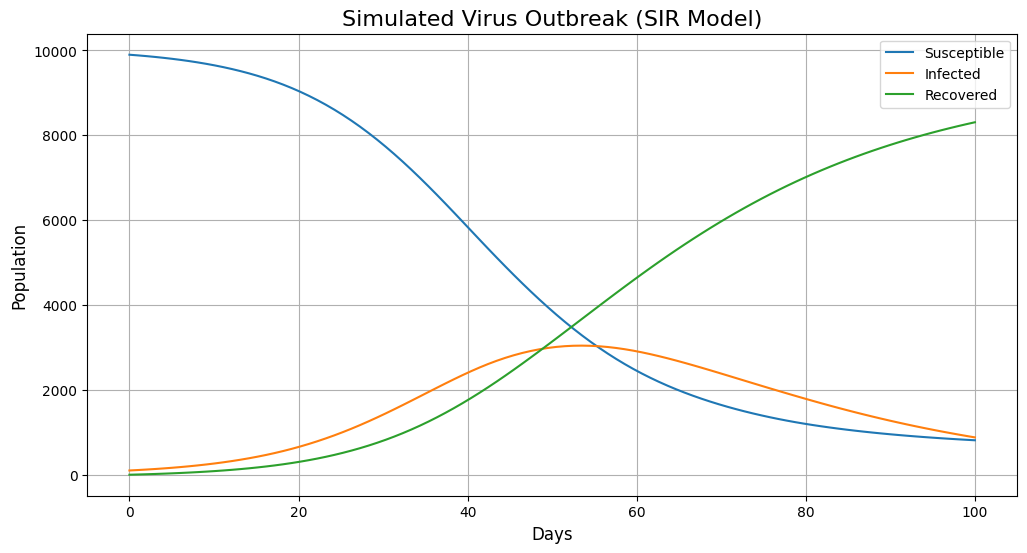

In [94]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the SIR model
def sir_model(t, y, beta, gamma, N):
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Parameters
N = 1e4 # Total population
I0 = 100       # Initial infected population
R0 = 0         # Initial recovered population
S0 = N - I0 - R0  # Initial susceptible population

beta = .15  # Contact rate
gamma = .05  # Recovery rate

# Simulate
y0 = [S0, I0, R0]
t = np.linspace(0, 100, 100)  # Simulate for 100 days
sol = solve_ivp(sir_model, [t[0], t[-1]], y0, args=(beta, gamma, N), t_eval=t)

# Extract results
S, I, R = sol.y

# Plot the simulated outbreak
plt.figure(figsize=(12, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.title('Simulated Virus Outbreak (SIR Model)', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend()
plt.grid()
plt.show()


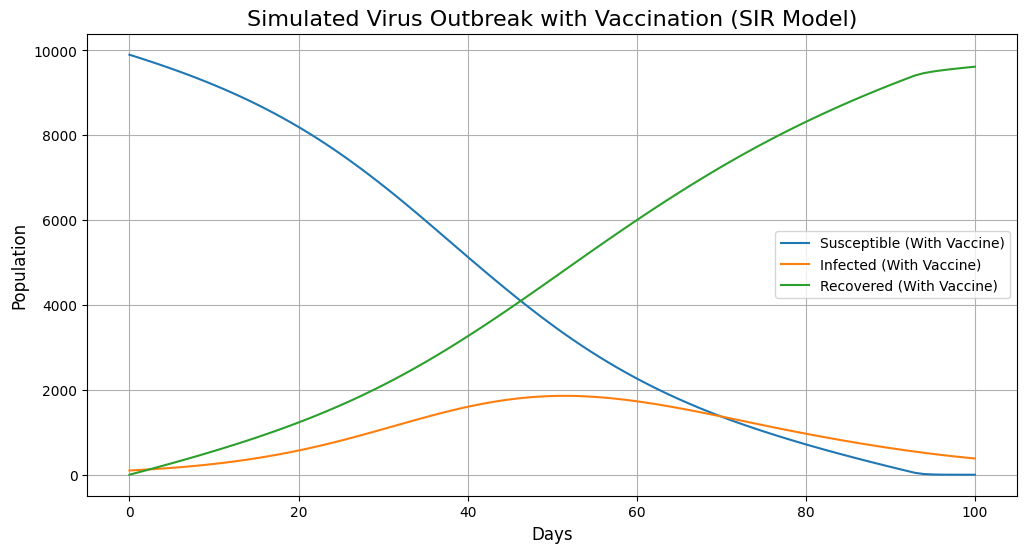

In [99]:
# Define the SIR model with vaccination
def sir_model_vaccine(t, y, beta, gamma, N, V, E):
    S, I, R = y
    vaccine_effective = min(V, S) * E  # Vaccination affects susceptible individuals
    dS_dt = -beta * S * I / N - vaccine_effective
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I + vaccine_effective
    return [dS_dt, dI_dt, dR_dt]

# Parameters (Same as above)
# Additional vaccine parameters
V = 50       # Vaccination rate (vaccines/day)
E = 0.95     # Vaccine effectiveness (%)

# Simulate
y0 = [S0, I0, R0]
t = np.linspace(0, 100, 100)  # Simulate for 100 days
sol_vaccine = solve_ivp(sir_model_vaccine, [t[0], t[-1]], y0, args=(beta, gamma, N, V, E), t_eval=t)

# Extract results
S_vaccine, I_vaccine, R_vaccine = sol_vaccine.y

# Plot the results with vaccination
plt.figure(figsize=(12, 6))
plt.plot(t, S_vaccine, label='Susceptible (With Vaccine)')
plt.plot(t, I_vaccine, label='Infected (With Vaccine)')
plt.plot(t, R_vaccine, label='Recovered (With Vaccine)')
plt.title('Simulated Virus Outbreak with Vaccination (SIR Model)', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend()
plt.grid()
plt.show()
